In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [2]:
def is_nighttime(image_path):
    # 读取图像
    image = cv2.imread(image_path)
    
    # 将图像转换为灰度图像
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # print(type(gray_image))
    # 计算图像的平均亮度
    average_brightness = gray_image.mean()
    
    # 设置一个阈值来区分白天和黑夜（根据实际情况调整阈值）
    threshold = 70
    

    # 判断图像是白天还是黑夜
    if average_brightness < threshold:
        return True  # 夜晚
    else:
        return False  # 白天
# 使用示例
if __name__ == "__main__":
    image_path = "./imgs/sunny2.jpg"  # 替换为要测试的图像路径
    
    if is_nighttime(image_path):
        print("这是一个夜晚的图像。")
    else:
        print("这是一个白天的图像。")


这是一个白天的图像。


In [3]:
'''小测试'''
images_path = "./imgs"
list_img = os.listdir(images_path)
for pic in list_img:
    if pic.endswith(".jpg"):
        print("pic {} is {}".format(pic, "night" if is_nighttime(os.path.join(images_path,pic)) else "day"))


pic night1.jpg is night
pic night10.jpg is night
pic night2.jpg is night
pic night3.jpg is night
pic night4.jpg is night
pic night5.jpg is night
pic night6.jpg is night
pic night7.jpg is night
pic night8.jpg is night
pic night9.jpg is night
pic rain1.jpg is day
pic rain2.jpg is day
pic rain3.jpg is day
pic rain4.jpg is day
pic rain5.jpg is day
pic sunny1.jpg is day
pic sunny2.jpg is day
pic sunny3.jpg is day
pic sunny4.jpg is day
pic sunny5.jpg is day


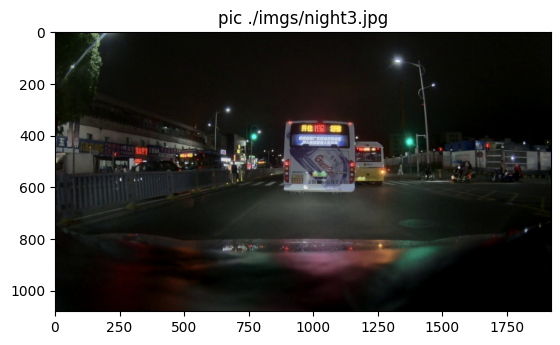

In [4]:
def plt_trafficlight(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('pic {}'.format(image_path))
    # plt.axis('off')  # 可选，隐藏坐标轴
    plt.show()

plt_trafficlight("./imgs/night3.jpg")

In [20]:
'''图像拉出来，增强分类
首先判断图象是白天场景还是黑夜场景，将白天场景的图像修改为day，夜晚场景的图像修改为night，依次往下排序
#暂时仅支持jpg
'''
ori_file_path = r"G:\datasets\TLD_train3"
destination_file_path = r"G:\TLD_augments"
if not os.path.exists(os.path.join(destination_file_path,"images","night")):
    os.makedirs(os.path.join(destination_file_path,"images","night"))
if not os.path.exists(os.path.join(destination_file_path,"images","day")):
    os.makedirs(os.path.join(destination_file_path,"images","day"))
if not os.path.exists(os.path.join(destination_file_path,"labels","night")):
    os.makedirs(os.path.join(destination_file_path,"labels","night"))
if not os.path.exists(os.path.join(destination_file_path,"labels","day")):
    os.makedirs(os.path.join(destination_file_path,"labels","day"))

                      
# pic_file = ["train","test"]
pic_file = ["train"]
# if not os.path.exists(destination_file_path):
#     os.makedirs(destination_file_path)

day_cnt = 0
night_cnt = 0
for is_train in pic_file:
    pic_path = os.path.join(ori_file_path,"images",is_train)
    lab_path = os.path.join(ori_file_path,"labels",is_train)
    pic_list = os.listdir(pic_path)
    for pic in pic_list:
        
        if not (pic.endswith(".jpg") or pic.endswith(".png")):

            # print(pic,not (pic.endswith(".jpg") and pic.endswith(".png")))
            continue

        image_path = os.path.join(ori_file_path,"images",is_train,pic)
        label_path = os.path.join(ori_file_path,"labels",is_train, pic.replace(".jpg", ".txt"))
        print(image_path)
        if is_nighttime(image_path):
            night_cnt += 1
            # print("这是一个夜晚的图像。")
            shutil.copy(image_path,os.path.join(destination_file_path,"images","night","night{}.jpg".format(night_cnt)))
            shutil.copy(label_path,os.path.join(destination_file_path,"labels","night","night{}.txt".format(night_cnt)))
        else:
            day_cnt += 1
            # print("这是一个白天的图像。")
            shutil.copy(image_path,os.path.join(destination_file_path,"images","day","day{}.jpg".format(day_cnt)))
            shutil.copy(label_path,os.path.join(destination_file_path,"labels","day","day{}.txt".format(day_cnt)))

G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_1.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_10.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_11.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_13.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_14.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_15.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_16.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_17.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_19.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_2.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_20.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_21.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_22.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_23.jpg
G:\datasets\TLD_train3\images\train\2022830_21-18-40_0_214_24.jpg
G:\datasets\